# Data Composition of an ELID file from SEM

In [1]:
import numpy as np
import pandas as pd
import PyMca5 as pymca
from rsciio.phenom import file_reader
from scipy.ndimage import zoom
import hyperspy.api as hs
import matplotlib.pyplot as plt
from scipy.ndimage import zoom
import pdfplumber
import matplotlib.animation as animation

In [2]:
#Reading test.elid
filepath = "/home/sakshis/Matraca/Matraca/C1_10-11-2023/C1_10-11-2023.elid"

In [3]:
pdf_path = "Table_1-2.pdf"

In [4]:
datasets = file_reader(filepath)

In [5]:
# Extracting data from test.elid and converting it into a dataframe to perform next set of operations

In [5]:
df = pd.DataFrame(datasets)

In [6]:
df.head()

,data,axes,metadata,original_metadata,mapping
0,"[[97, 99, 102, 105, 105, 105, 105, 98, 100, 10...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C1_10-11-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
1,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C1_10-11-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
2,"[[108, 102, 97, 99, 108, 102, 102, 105, 106, 1...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C1_10-11-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...
3,"[[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[{'index_in_array': 0, 'name': 'y', 'offset': ...",{'General': {'original_filename': 'C1_10-11-20...,"{'databarHeight': '0', 'databarFields': '4091'...",{'acquisition.scan.detectors.EDS.detector_azim...


In [9]:
df.columns

Index(['data', 'axes', 'metadata', 'original_metadata', 'mapping'], dtype='object')

### Column Information

- **Data**:  
  Contains data matrices that will be discussed in detail later.

- **Axes**:  
  Includes calibration information for the spatial and energy axes:  

  - **For Images**:
    - **Y-axis**:
      - Includes:
        - **Offset**: Starting point of the axis.
        - **Scale**: Step size between data points.
        - **Size**: Number of points along the axis.
        - **Units**: Measured in micrometers (µm).
    - **X-axis**:
      - Includes:
        - **Offset**: Starting point of the axis.
        - **Scale**: Step size between data points.
        - **Size**: Number of points along the axis.
        - **Units**: Measured in micrometers (µm).

  - **Energy Axis**:
    - Includes:
      - **Offset**: Represents the starting energy (device offset) at which the sample is exposed.
      - **Size**: Number of energy levels captured in the spectrum (2048).
      - **Units**: Measured in kiloelectronvolts (keV).

In [10]:
df['axes'][1]

[{'index_in_array': 0,
  'name': 'y',
  'offset': 0,
  'scale': 6.155217356667842,
  'size': 150,
  'units': 'µm',
  'navigate': True},
 {'index_in_array': 1,
  'name': 'x',
  'offset': 0,
  'scale': 3.8470108479174017,
  'size': 240,
  'units': 'µm',
  'navigate': True},
 {'index_in_array': 2,
  'name': 'X-ray energy',
  'offset': -0.051947935368042875,
  'scale': 0.009814482345900658,
  'size': 2048,
  'units': 'keV',
  'navigate': False}]

In [11]:
for i in range(4):
    print(df['data'][i].shape)

(600, 960)
(150, 240, 2048)
(600, 960)
(150, 240, 2048)


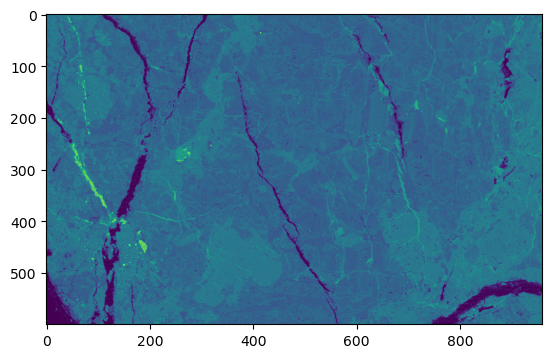

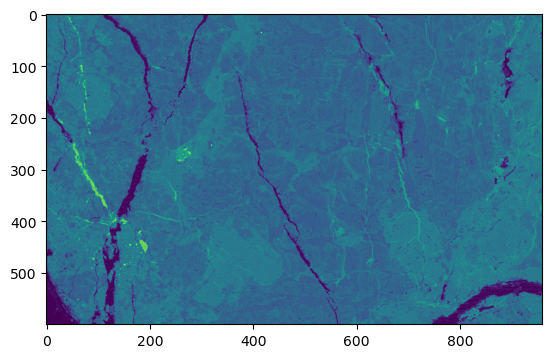

In [12]:
for i in range(4):
    data = df['data'][i]
    if data.ndim == 2:  
        plt.imshow(data)
        plt.show()  #Show each reference image
#In this reading the user might have tried to draw two region maps?

### What does the reference image that we see in cell 72 mean?
- The first two data matrices represent a reference image of size **960x600**. The values in the matrix range from 0-255 indicating that it is a greyscale image with 0 for White and 255 for Black

### Data Collection and Analysis Overview

- Data is collected in small regions of **150x240 pixels**, where the sample is exposed to **2048 energy levels** (typically ranging from **0 to 15 keV**) with varying intensities. This helps detect and capture **elemental peaks** that reveal the sample's composition.  

- To align the results with the original **600x960 reference image**, the data from the **150x240 regions** is **interpolated** and scaled up using a **scale factor**, effectively "zooming in" to match the resolution of the original image.

In [7]:
sem_image = df['data'][0] #600*960 image
eds_data =  df['data'][1] # 

In [8]:
scale_factors = (
            sem_image.shape[0] / eds_data.shape[0], 
            sem_image.shape[1] / eds_data.shape[1]
        )

In [9]:
rescaled_eds_map = np.zeros((600,960,2048), dtype=np.uint64)
for i in range(2048):
    rescaled_eds_map[:,:,i] = zoom(eds_data[:,:,i], scale_factors, order=1)

In [10]:
rescaled_eds_map[50,40,:]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint64)

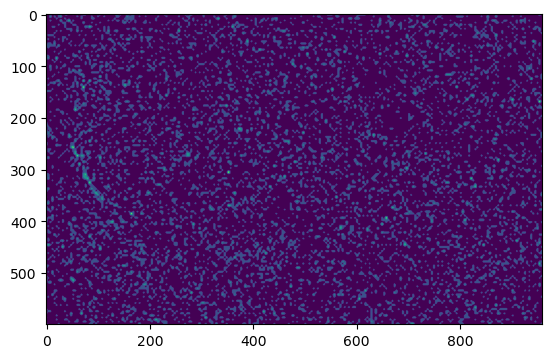

In [11]:
plt.imshow(rescaled_eds_map[:,:,250])

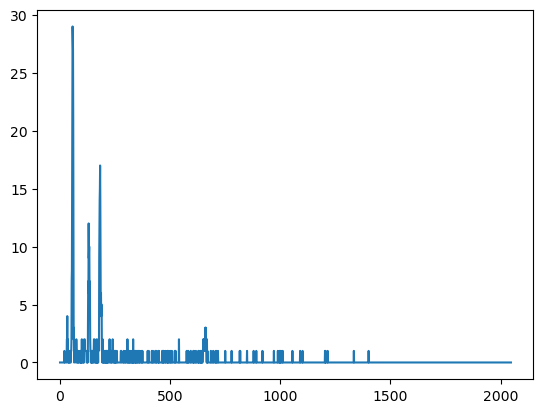

In [12]:
plt.plot(rescaled_eds_map[50,40,:])

In [85]:
df.shape

(4, 5)

In [86]:
df['axes'][1][1]

{'index_in_array': 1,
 'name': 'x',
 'offset': 0,
 'scale': 3.8470108479174017,
 'size': 240,
 'units': 'µm',
 'navigate': True}

In [87]:
df['axes'][1][2]['offset']

-0.051947935368042875

In [13]:
scale_factor = df['axes'][1][2]['scale']*100

In [14]:
energy_range = np.arange(2048) * scale_factor

## Plot to display changes in sample with different energy intensities

In [ ]:
fig, ax = plt.subplots()
line, = ax.plot([], [], lw=2)
ax.set_xlim(0, rescaled_eds_map.shape[2])  # x-axis (energy levels)
ax.set_ylim(0, np.max(rescaled_eds_map))  # y-axis (intensity)
ax.set_xlabel("Intensity")
ax.set_ylabel("Counts")
ax.set_title("Energy Spectrum Animation")

def init():
    line.set_data([], [])
    return line,

# Function to update the plot for each frame
def update_frame(frame):
    # Compute x, y coordinates based on frame
    total_points = rescaled_eds_map.shape[0] * rescaled_eds_map.shape[1]
    point_idx = total_points - 100 + frame  # Last 100 points
    
    x_idx = point_idx // rescaled_eds_map.shape[1]  # Row index
    y_idx = point_idx % rescaled_eds_map.shape[1]  # Column index
    
    spectrum = rescaled_eds_map[x_idx, y_idx, :]  # Energy spectrum at (x_idx, y_idx)
    line.set_data(range(len(spectrum)), spectrum)
    ax.set_title(f"Variation in counts with energy intensities")
    return line,

# Reduce frames to the last 100
total_frames = 100

# Create the animation
ani = animation.FuncAnimation(
    fig, update_frame, frames=total_frames, init_func=init, interval=50, blit=True
)

# Display the animation in the notebook
from IPython.display import HTML
HTML(ani.to_jshtml())

### Alternatively, we can transform the coordinates to fit within a 150x240 image grid and associate the spectra with each grid point.

In [ ]:
sem_x = 50
sem_y = 40
eds_x = int(sem_x * eds_data.shape[1] / sem_image.shape[1])
eds_y = int(sem_y * eds_data.shape[0] / sem_image.shape[0])

eds_x = np.clip(eds_x, 0, eds_data.shape[1] - 1)
eds_y = np.clip(eds_y, 0, eds_data.shape[0] - 1)

In [ ]:
plt.plot(eds_data[eds_x,eds_y,:])